In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = 'comprehensive_mutual_funds_data.csv'
data = pd.read_csv(file_path)
data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [3]:
# User inputs
timeframe = 'returns_1yr'  # Example: 'returns_1yr', 'returns_3yr', 'returns_5yr'
risk_level = 5  # Example: User risk preference (1-6)

In [4]:
# Filter data based on the selected timeframe and required columns
required_columns = ['returns_1yr', 'returns_3yr', 'returns_5yr', 'risk_level']
filtered_data = data.dropna(subset=required_columns).reset_index(drop=True)

In [5]:
# Define independent variables (features) and dependent variable (target)
X = filtered_data[['returns_1yr', 'returns_3yr', 'returns_5yr', 'risk_level']]
y = filtered_data[timeframe]

In [6]:
# Split data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [7]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Predict returns on the test data
y_pred = model.predict(X_test)


In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 4.5710791320956934e-29
R² Score: 1.0


In [10]:
# Add predictions to the test dataset for ranking
test_results = X_test.copy()
test_results['Actual Returns'] = y_test.values
test_results['Predicted Returns'] = y_pred

In [11]:
# Map back mutual fund details for output
test_results = test_results.reset_index()
test_results['scheme_name'] = filtered_data.loc[test_results['index'], 'scheme_name'].values
test_results['sharpe'] = filtered_data.loc[test_results['index'], 'sharpe'].values
test_results['expense_ratio'] = filtered_data.loc[test_results['index'], 'expense_ratio'].values
test_results['fund_size_cr'] = filtered_data.loc[test_results['index'], 'fund_size_cr'].values

In [12]:
# Drop the temporary 'index' column
test_results.drop(columns=['index'], inplace=True)

# Rank funds by predicted returns, breaking ties using expense ratio
ranked_results = test_results.sort_values(
    by=['Predicted Returns', 'expense_ratio'], ascending=[False, True]).head(3)

# Display the top 3 funds
print("\nTop 3 Funds:")
print(ranked_results[['scheme_name', 'Predicted Returns', 'sharpe', 'expense_ratio', 'fund_size_cr']])


Top 3 Funds:
                                         scheme_name  Predicted Returns  \
112                   Bank of India Credit Risk Fund              130.8   
43   Bank of India Short Term Income – Direct Growth               28.3   
47                     ICICI Pru Infrastructure Fund               24.3   

    sharpe  expense_ratio  fund_size_cr  
112   0.38           1.54         161.0  
43    0.43           0.98          72.0  
47    1.83           1.64        2269.0  


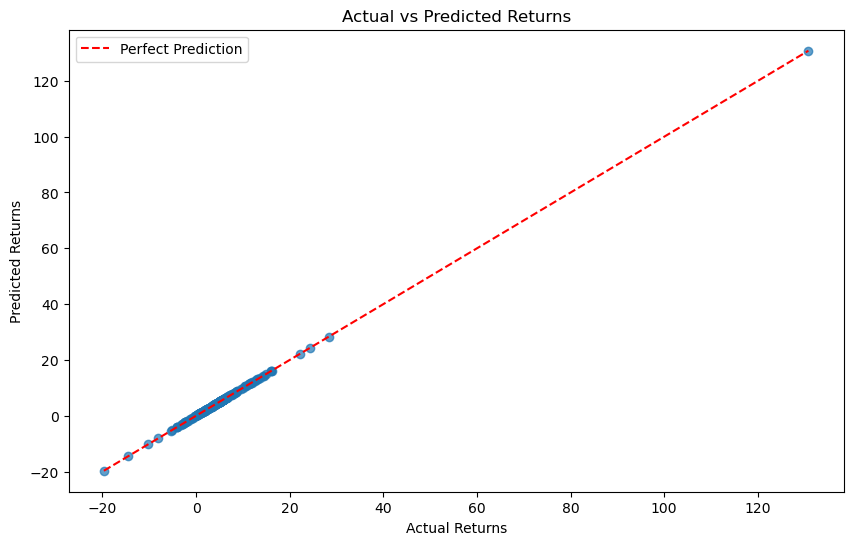

In [13]:
# Visualization: Actual vs Predicted Returns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Returns')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.legend()
plt.show()

## Removing 5yr return

Mean Squared Error (MSE) after dropping 'returns_5yr': 8.875889630693912e-30
R² Score after dropping 'returns_5yr': 1.0

Top 3 Funds after dropping 'returns_5yr':
                                         scheme_name  Predicted Returns  \
112                   Bank of India Credit Risk Fund              130.8   
43   Bank of India Short Term Income – Direct Growth               28.3   
47                     ICICI Pru Infrastructure Fund               24.3   

    sharpe  expense_ratio  fund_size_cr  
112   0.38           1.54         161.0  
43    0.43           0.98          72.0  
47    1.83           1.64        2269.0  


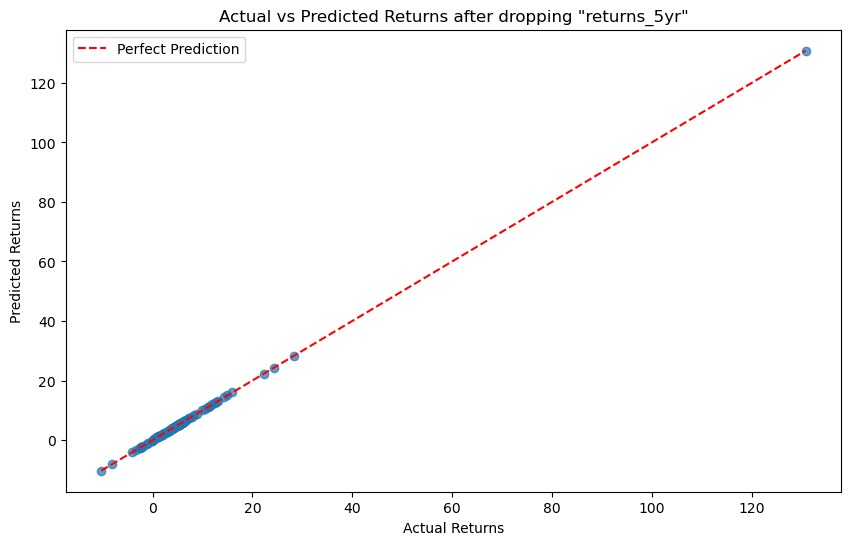

In [14]:
# Define independent variables (features) and dependent variable (target)
X = filtered_data[['returns_1yr', 'returns_3yr', 'risk_level']]  # Dropping 'returns_5yr'
y = filtered_data[timeframe]  # Target variable remains based on user input

# Split data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict returns on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE) after dropping 'returns_5yr': {mse}")
print(f"R² Score after dropping 'returns_5yr': {r2}")

# Add predictions to the test dataset for ranking
test_results = X_test.copy()
test_results['Actual Returns'] = y_test.values
test_results['Predicted Returns'] = y_pred

# Map back mutual fund details for output
test_results = test_results.reset_index()
test_results['scheme_name'] = filtered_data.loc[test_results['index'], 'scheme_name'].values
test_results['sharpe'] = filtered_data.loc[test_results['index'], 'sharpe'].values
test_results['expense_ratio'] = filtered_data.loc[test_results['index'], 'expense_ratio'].values
test_results['fund_size_cr'] = filtered_data.loc[test_results['index'], 'fund_size_cr'].values

# Drop the temporary 'index' column
test_results.drop(columns=['index'], inplace=True)

# Rank funds by predicted returns, breaking ties using expense ratio
ranked_results = test_results.sort_values(
    by=['Predicted Returns', 'expense_ratio'], ascending=[False, True]
).head(3)

# Display the top 3 funds
print("\nTop 3 Funds after dropping 'returns_5yr':")
print(ranked_results[['scheme_name', 'Predicted Returns', 'sharpe', 'expense_ratio', 'fund_size_cr']])

# Visualization: Actual vs Predicted Returns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Returns after dropping "returns_5yr"')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.legend()
plt.show()


### Random Forest

Mean Squared Error (MSE): 91.28114780000007
R² Score: 0.3808766829516569

Feature Importances:
returns_1yr: 0.9978
returns_3yr: 0.0019
risk_level: 0.0002

Top 3 Funds:
                                         scheme_name  Predicted Returns  \
47                     ICICI Pru Infrastructure Fund             22.163   
43   Bank of India Short Term Income – Direct Growth             22.068   
112                   Bank of India Credit Risk Fund             22.068   

    sharpe  expense_ratio  fund_size_cr  
47    1.83           1.64        2269.0  
43    0.43           0.98          72.0  
112   0.38           1.54         161.0  


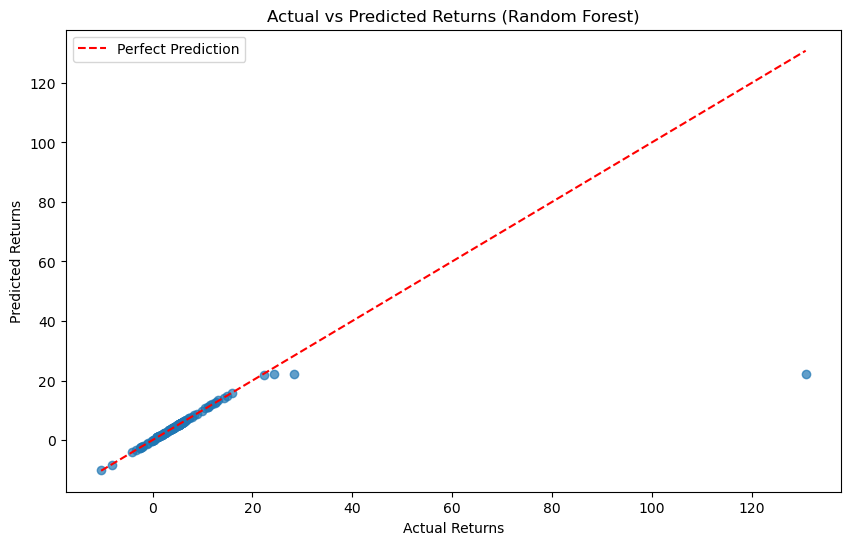

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define independent variables (features) and dependent variable (target)
X = filtered_data[['returns_1yr', 'returns_3yr', 'risk_level']]
y = filtered_data[timeframe]  # Target variable

# Split data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict returns on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Feature importance
feature_importances = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Add predictions to the test dataset for ranking
test_results = X_test.copy()
test_results['Actual Returns'] = y_test.values
test_results['Predicted Returns'] = y_pred

# Map back mutual fund details for output
test_results = test_results.reset_index()
test_results['scheme_name'] = filtered_data.loc[test_results['index'], 'scheme_name'].values
test_results['sharpe'] = filtered_data.loc[test_results['index'], 'sharpe'].values
test_results['expense_ratio'] = filtered_data.loc[test_results['index'], 'expense_ratio'].values
test_results['fund_size_cr'] = filtered_data.loc[test_results['index'], 'fund_size_cr'].values

# Drop the temporary 'index' column
test_results.drop(columns=['index'], inplace=True)

# Rank funds by predicted returns, breaking ties using expense ratio
ranked_results = test_results.sort_values(
    by=['Predicted Returns', 'expense_ratio'], ascending=[False, True]
).head(3)

# Display the top 3 funds
print("\nTop 3 Funds:")
print(ranked_results[['scheme_name', 'Predicted Returns', 'sharpe', 'expense_ratio', 'fund_size_cr']])

# Visualization: Actual vs Predicted Returns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Returns (Random Forest)')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.legend()
plt.show()


Mean Squared Error (MSE): 7.159091602626686
R² Score: 0.48832967954721895

Feature Importances:
returns_1yr: 0.1670
returns_3yr: 0.8111
risk_level: 0.0219

Top 3 Funds:
                               scheme_name  Predicted Returns sharpe  \
83                 Sundaram Small Cap Fund             18.033   1.88   
26   Franklin India Smaller Companies Fund             15.532   1.91   
104                     DSP Small Cap Fund             14.893   1.78   

     expense_ratio  fund_size_cr  
83            1.01        1962.0  
26            1.03        7308.0  
104           0.90        8953.0  


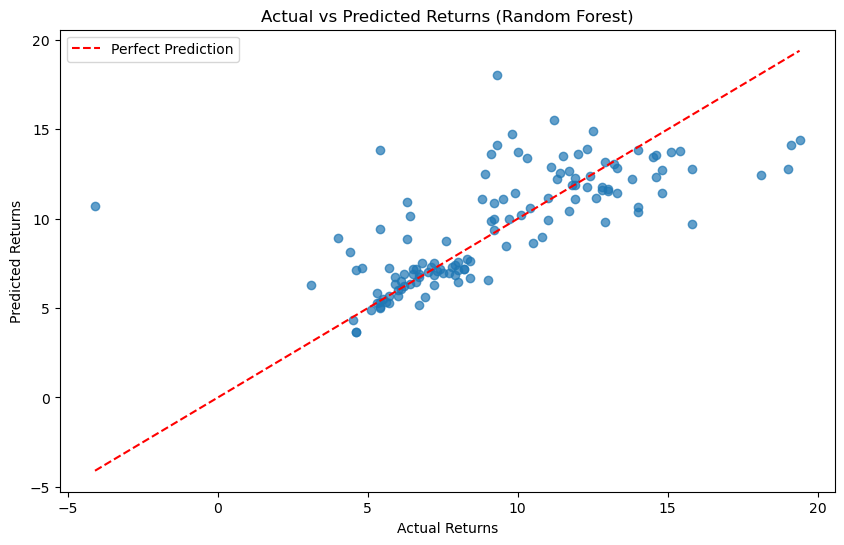

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'comprehensive_mutual_funds_data.csv'
data = pd.read_csv(file_path)

# Hardcoded inputs
timeframe = 'returns_5yr'  # Change to 'returns_1yr' or 'returns_5yr' as needed
risk_level = 3 # Hardcoded risk level (1-6)

# Filter data based on required columns
required_columns = ['returns_1yr', 'returns_3yr', 'returns_5yr', 'risk_level']
filtered_data = data.dropna(subset=required_columns).reset_index(drop=True)

# Define independent variables (features) and dependent variable (target)
X = filtered_data[['returns_1yr', 'returns_3yr', 'risk_level']]
y = filtered_data[timeframe]

# Split data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict returns on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Feature importance
feature_importances = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Add predictions to the test dataset for ranking
test_results = X_test.copy()
test_results['Actual Returns'] = y_test.values
test_results['Predicted Returns'] = y_pred

# Map back mutual fund details for output
test_results = test_results.reset_index()
test_results['scheme_name'] = filtered_data.loc[test_results['index'], 'scheme_name'].values
test_results['sharpe'] = filtered_data.loc[test_results['index'], 'sharpe'].values
test_results['expense_ratio'] = filtered_data.loc[test_results['index'], 'expense_ratio'].values
test_results['fund_size_cr'] = filtered_data.loc[test_results['index'], 'fund_size_cr'].values

# Drop the temporary 'index' column
test_results.drop(columns=['index'], inplace=True)

# Rank funds by predicted returns, breaking ties using expense ratio
ranked_results = test_results.sort_values(
    by=['Predicted Returns', 'expense_ratio'], ascending=[False, True]
).head(3)

# Display the top 3 funds
print("\nTop 3 Funds:")
print(ranked_results[['scheme_name', 'Predicted Returns', 'sharpe', 'expense_ratio', 'fund_size_cr']])

# Visualization: Actual vs Predicted Returns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Returns (Random Forest)')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.legend()
plt.show()


## Using this one Random forest


Mean Squared Error (MSE): 0.12360251538461539
R² Score: 0.9911659548213615

Feature Importances:
returns_1yr: 0.0004
returns_3yr: 0.0004
returns_5yr: 0.9987
risk_level: 0.0005

Top 3 Funds:
                             scheme_name  Predicted Returns sharpe  \
21                   AXIS Small Cap Fund             19.854   2.06   
53                   Quant Absolute Fund             19.830   2.12   
33  PGIM India Midcap Opportunities Fund             19.345   1.92   

    expense_ratio  fund_size_cr  
21           0.54       11462.0  
53           0.56        1013.0  
33           0.46        7707.0  


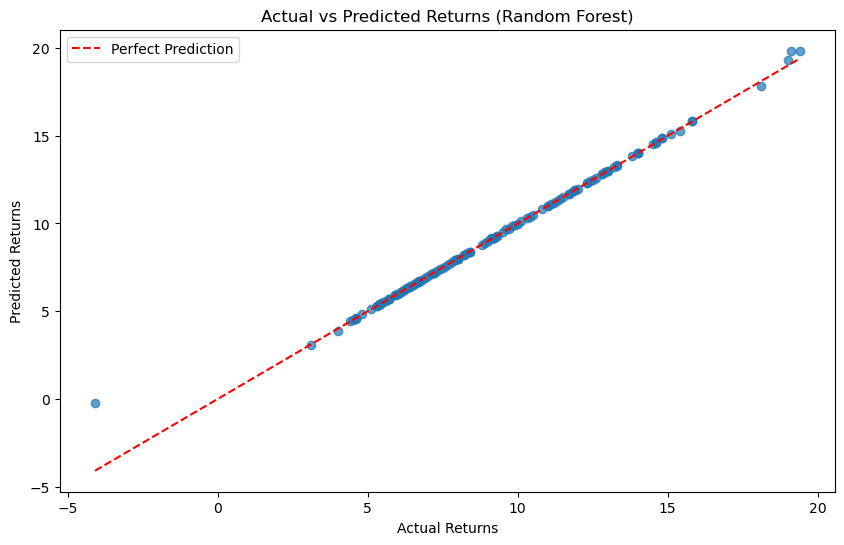

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'comprehensive_mutual_funds_data.csv'
data = pd.read_csv(file_path)

# Hardcoded inputs
timeframe = 'returns_5yr'  # Change to 'returns_1yr', 'returns_3yr', or 'returns_5yr' as needed
risk_level = 5  # Hardcoded risk level (1-6)

# Filter data based on required columns
required_columns = ['returns_1yr', 'returns_3yr', 'returns_5yr', 'risk_level']
filtered_data = data.dropna(subset=required_columns).reset_index(drop=True)

# Define independent variables (features) and dependent variable (target)
X = filtered_data[['returns_1yr', 'returns_3yr', 'returns_5yr', 'risk_level']]  # Keeping returns_5yr
y = filtered_data[timeframe]

# Split data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict returns on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Feature importance
feature_importances = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Add predictions to the test dataset for ranking
test_results = X_test.copy()
test_results['Actual Returns'] = y_test.values
test_results['Predicted Returns'] = y_pred

# Map back mutual fund details for output
test_results = test_results.reset_index()
test_results['scheme_name'] = filtered_data.loc[test_results['index'], 'scheme_name'].values
test_results['sharpe'] = filtered_data.loc[test_results['index'], 'sharpe'].values
test_results['expense_ratio'] = filtered_data.loc[test_results['index'], 'expense_ratio'].values
test_results['fund_size_cr'] = filtered_data.loc[test_results['index'], 'fund_size_cr'].values

# Drop the temporary 'index' column
test_results.drop(columns=['index'], inplace=True)

# Rank funds by predicted returns, breaking ties using expense ratio
ranked_results = test_results.sort_values(
    by=['Predicted Returns', 'expense_ratio'], ascending=[False, True]
).head(3)

# Display the top 3 funds
print("\nTop 3 Funds:")
print(ranked_results[['scheme_name', 'Predicted Returns', 'sharpe', 'expense_ratio', 'fund_size_cr']])

# Visualization: Actual vs Predicted Returns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Returns (Random Forest)')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.legend()
plt.show()
